In [ ]:
import json
import os
import requests
from datetime import datetime as dt
from datetime import timezone, timedelta


# Get FABRIC Token

### FABRIC Credential Manager
Login to the [FABRIC Credential Manager site](https://cm.fabric-testbed.net)

Click the "Create Token" button


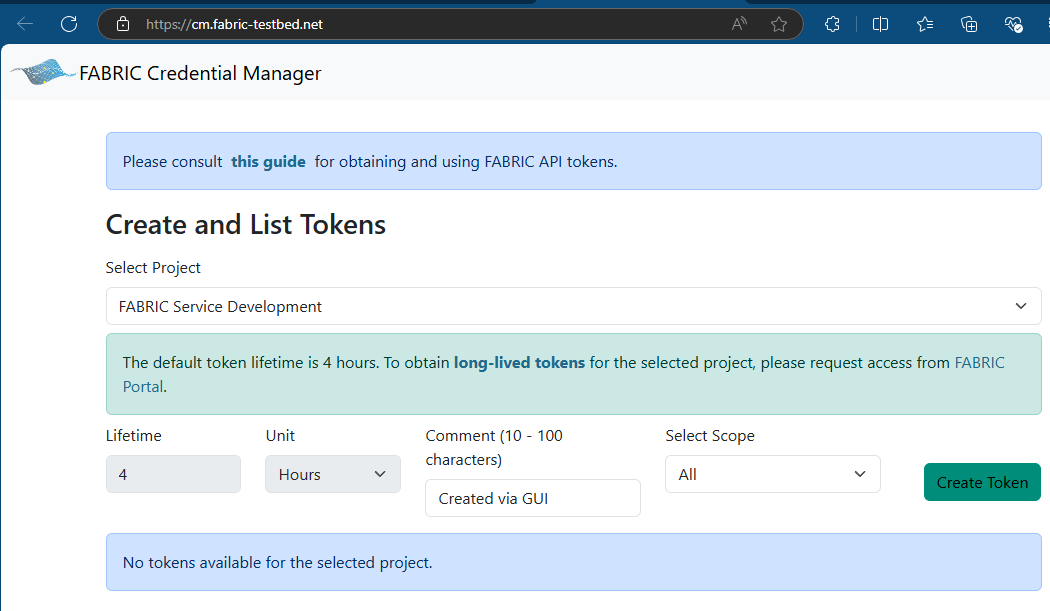

### Copy the created id token

The id token JSON will be displayed along with a "Copy" and a "Download" button.

You have a few options here.
* Use "Download" button and place the token in the same directory as this notebook.
* Use "Copy" button and paste the token as a new file named "id_token.json" in the same directory as this notebook.
* Just copy the "id_token" value and paste as a string in the next cell for the value of "id_token". Note the value is highlighted in blue in the image and will be around 2000 characters.

Helpful Hint: To edit a JSON file right click on the file name, choose **Open With** then **Editor** 

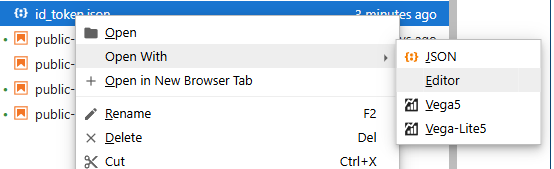

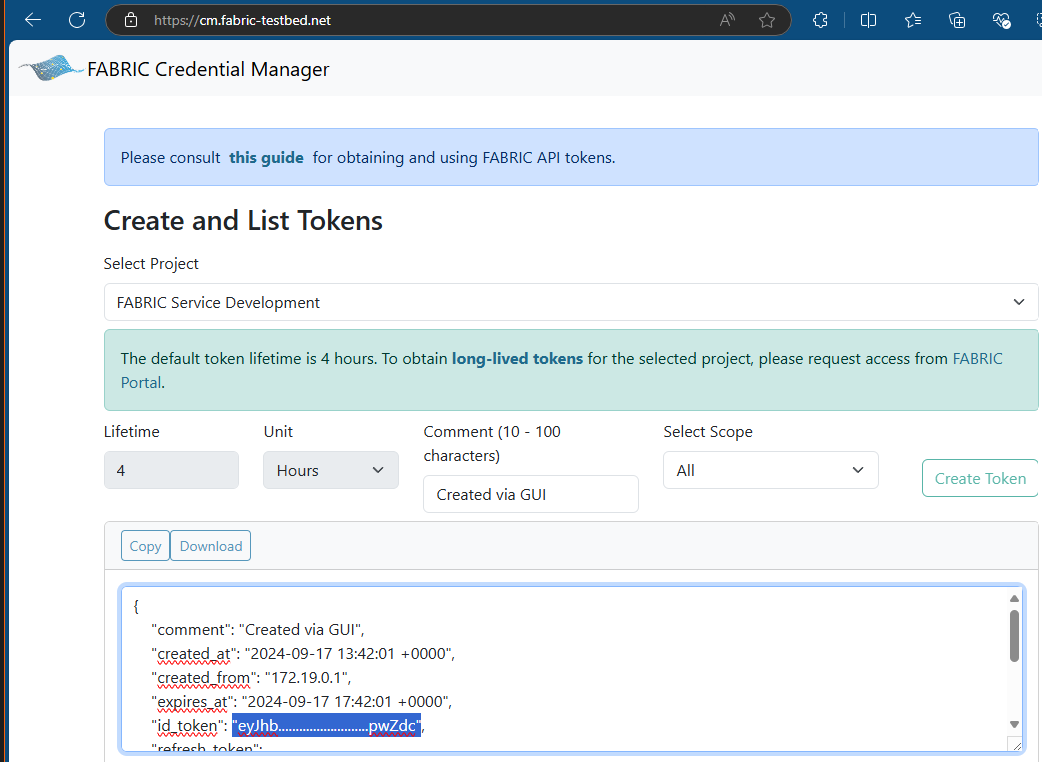

# Load the id_token value
The value will be set as a python variable, ```id_token``` and as an environment value ```ID_TOKEN```.

In [ ]:
# There are 2 options here.
# 1. Paste just the id_token value from the id_token.json object here.
id_token = None

# OR
# 2. Read the value from the id_token.json file.
if not id_token:
    with open("id_token.json") as f:
        id_token_dic = json.load(f)
    
    id_token = id_token_dic["id_token"]

os.environ['ID_TOKEN'] = id_token
# id_token is now accessible as a python variable for use in python code or as an environmental variable for use in comandlines or in BASH scripts

# REST API
Prometheus provides a REST API for obtaining metrics. The infrastructure-metrics site currently exposes two of these methods, **query** and **query_range**. See [Prometheus HTTP API](https://prometheus.io/docs/prometheus/latest/querying/api/#expression-queries) for details. 

REST APIs may be called in many ways. Below are examples given with CURL and PYTHON.

## Instant Query
The instant **query** returns a single value closest to the requested **start** time. If no **start** time is specified, the most recent value is returned.

The URL for instant queries is https://infrastructure-metrics.fabric-testbed.net/query

Instant queries need a **query** and, optionally, a **start** time.

### CURL instant query

In [ ]:
%%bash
curl https://infrastructure-metrics.fabric-testbed.net/query \
 -H "Authorization: fabric-token $ID_TOKEN" \
--data-urlencode 'query=100 - ((node_memory_MemAvailable_bytes{rack=~"amst", component_type="head", job="node"} * 100) / node_memory_MemTotal_bytes{rack=~"amst", component_type="head", job="node"})'  \

### CURL instant query with start time

In [ ]:
%%bash
curl https://infrastructure-metrics.fabric-testbed.net/query \
 -H "Authorization: fabric-token $ID_TOKEN" \
--data-urlencode 'query=100 - ((node_memory_MemAvailable_bytes{rack=~"amst", component_type="head", job="node"} * 100) / node_memory_MemTotal_bytes{rack=~"amst", component_type="head", job="node"})'  \
--data-urlencode 'start=2024-05-02T20:10:00Z' 

### Python instant query

In [ ]:
# Python instant query
url =  "https://infrastructure-metrics.fabric-testbed.net/query"
headers = { 'Authorization': f'fabric-token {id_token}'}
params = {'query': '100 - ((node_memory_MemAvailable_bytes{rack=~"amst", component_type="head", job="node"} * 100) / node_memory_MemTotal_bytes{rack=~"amst", component_type="head", job="node"})'} 

response = requests.post(url, headers=headers, params=params)
print(response.content)

### Python instant query with start time

In [ ]:
# Pyton instant query with a start time
url =  "https://infrastructure-metrics.fabric-testbed.net/query"
headers = { 'Authorization': f'fabric-token {id_token}'}
params = {'query': '100 - ((node_memory_MemAvailable_bytes{rack=~"amst", component_type="head", job="node"} * 100) / node_memory_MemTotal_bytes{rack=~"amst", component_type="head", job="node"})', 
          'start' : '2024-05-02T20:10:00Z'
         } 

response = requests.post(url, headers=headers, params=params)
print(response.content)

## Range Query
The range query, **query_range**, returns a set of values in the requested time range.

The URL for range queries is https://infrastructure-metrics.fabric-testbed.net/query_range

Range queries need a **query**, a **start**, an **end** time and optionally, a **step** value.

The **start** value is for the oldest time you want to query.

The **end** value is for the most recent time you want to query.

The optional **step** value is for the time between returned values. 30 seconds is the polling time for most metrics. Any value less will not get more data points. Higher values will return fewer data points. 

### Calculating time ranges
The start and end times are formatted YYYY-MM-DDTHH:mm:ssZ ie 2024-05-02T20:10:00Z .

These values can be created using python's datetime and timedelta.

In [ ]:
# Can use the current time (for end) and a previous time (for start) for the query range

# Calculate now time to get most recent values
now_date = dt.now(timezone.utc)
end_string = now_date.strftime('%Y-%m-%dT%H:%M:%SZ')

# Use timedelta of 1 hour to get values starting 1 hour before start date
start_date = now_date - timedelta(hours=1)
start_string = start_date.strftime('%Y-%m-%dT%H:%M:%SZ')

### CURL range query

In [ ]:
%%bash
curl https://infrastructure-metrics.fabric-testbed.net/query_range \
 -H "Authorization: fabric-token $ID_TOKEN" \
--data-urlencode 'query=100 - ((node_memory_MemAvailable_bytes{rack=~"amst", component_type="head", job="node"} * 100) / node_memory_MemTotal_bytes{rack=~"amst", component_type="head", job="node"})'  \
--data-urlencode 'start=2024-05-02T20:10:00Z' \
--data-urlencode 'end=2024-05-02T20:15:00Z'  \
--data-urlencode 'step=30s'

### Python range query

In [ ]:
# Python range query
url =  "https://infrastructure-metrics.fabric-testbed.net/query_range"
headers = { 'Authorization': f'fabric-token {id_token}'}
params = {'query': '100 - ((node_memory_MemAvailable_bytes{rack=~"amst", component_type="head", job="node"} * 100) / node_memory_MemTotal_bytes{rack=~"amst", component_type="head", job="node"})', 
          'start' : '2024-05-02T20:10:00Z',
          'end': '2024-05-03T20:15:00Z',
          'step' : '30s'
         } 

response = requests.post(url, headers=headers, params=params)
print(response.content)

# Creating Queries
A quick way to create and learn about queries is to use existing Grafana dashboards that show interesting data. 

For example, this graph shows traffic between Dallas and Atlanta, dall & atl, racks. To see the queries used to create this graph use the "Explore" feature. This can be access using the three dots menu in the upper right corner of the graph panel.

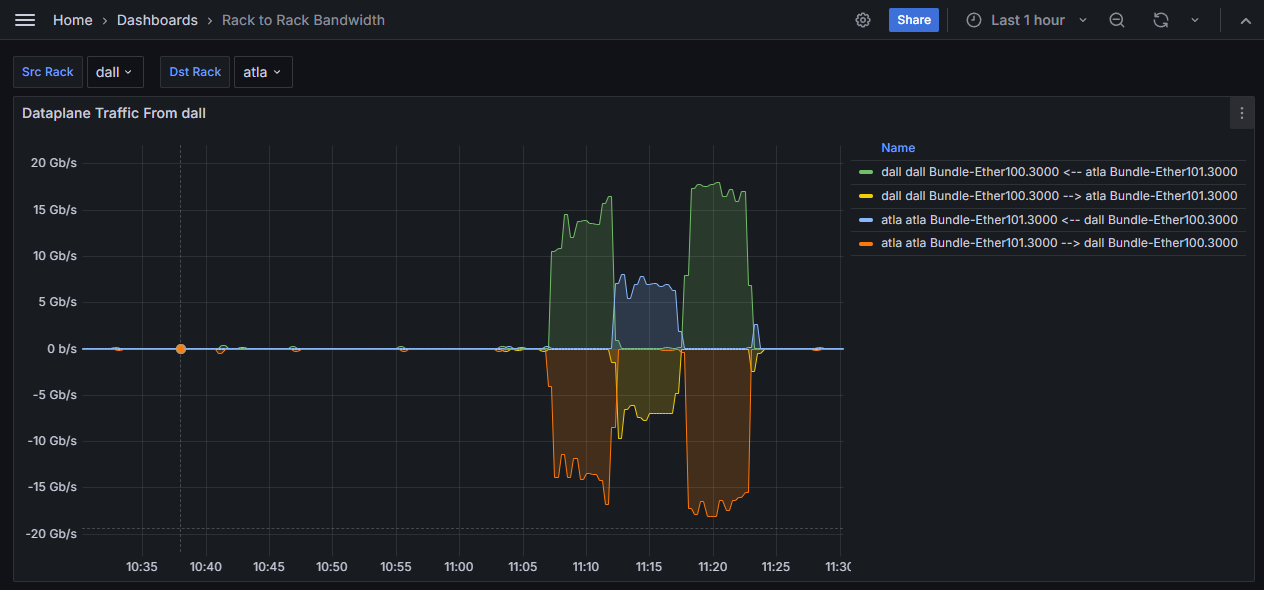


Choose "Explore" from the menu.

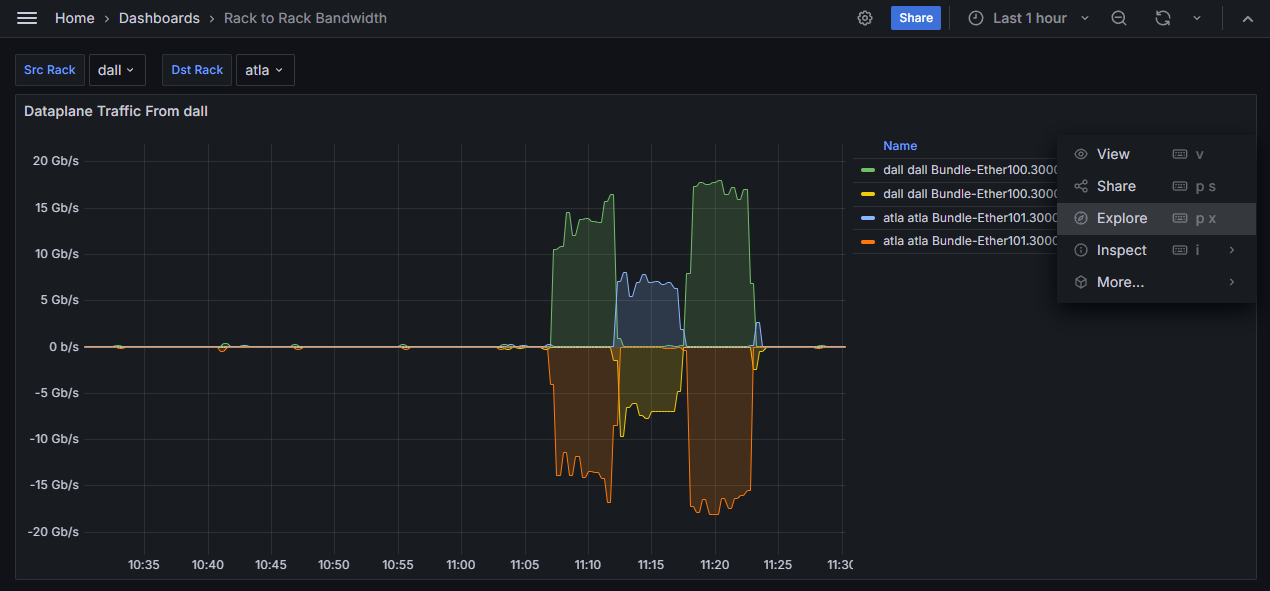

This will take you to the "Explore" page already filled in with the queries that were used to create the graph. In this case there are 4 queries: A,B,C and D. Note that the units in the graph are not known to the Explore graph. They are bits per second.

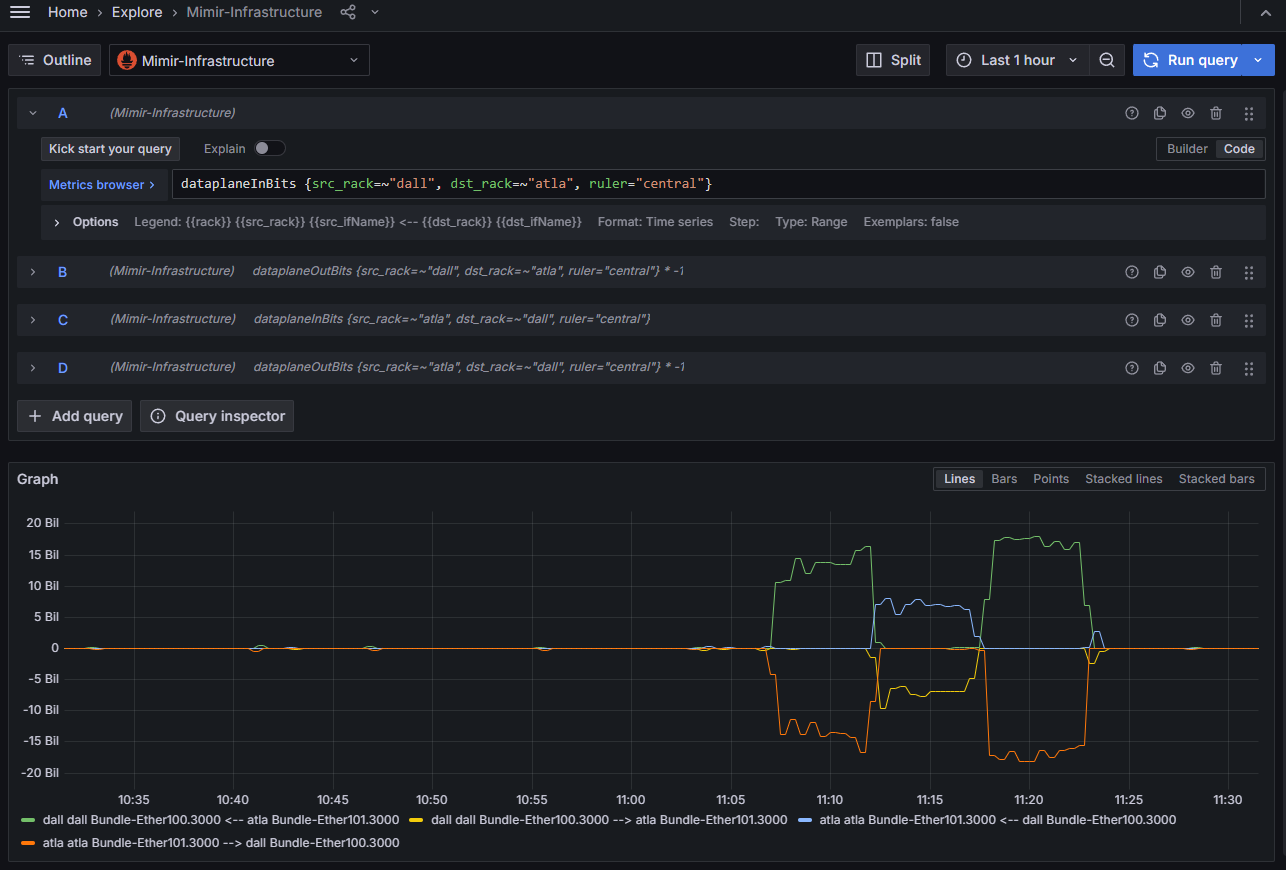

The query can be directly copied and used in the REST API call.

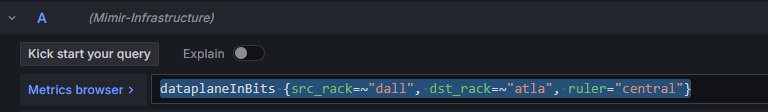

In [ ]:
# Python instant query
query_string = 'dataplaneInBits {src_rack=~"dall", dst_rack=~"atla", ruler="central"}'
url =  "https://infrastructure-metrics.fabric-testbed.net/query"
headers = { 'Authorization': f'fabric-token {id_token}'}
data = {'query': query_string }

response = requests.post(url, headers=headers, params=data)
print(response.content)

In [ ]:
# Use timedelta to create range query times
# Get the current time (for end) and previous time (for start) for the query range
now_date = dt.now(timezone.utc)
end_string = now_date.strftime('%Y-%m-%dT%H:%M:%SZ')

start_date = now_date - timedelta(hours=1)
start_string = start_date.strftime('%Y-%m-%dT%H:%M:%SZ')

# Range Query using query string
query_string = 'dataplaneInBits {src_rack=~"dall", dst_rack=~"atla", ruler="central"}'
url =  "https://infrastructure-metrics.fabric-testbed.net/query_range"
headers = { 'Authorization': f'fabric-token {id_token}'}
data = {'query': query_string,
        'start' : start_string,
        'end':  end_string,
        'step' : '30s'
       }

response = requests.post(url, headers=headers, params=data)
print(response.content)


# Finding Metric Names and Labels
Grafana's Explore section will show a list of all available metric names and corresponding labels.

Select the hamburger (three horizontal lines) found in the upper left of the page to expand the menu options. Select **Explore**. This will open the Explore page. Select the **Metrics browser** drop down to activate a list of all of the available metrics. Selecting a metric will then show all of the available label names that correspond with the metric.

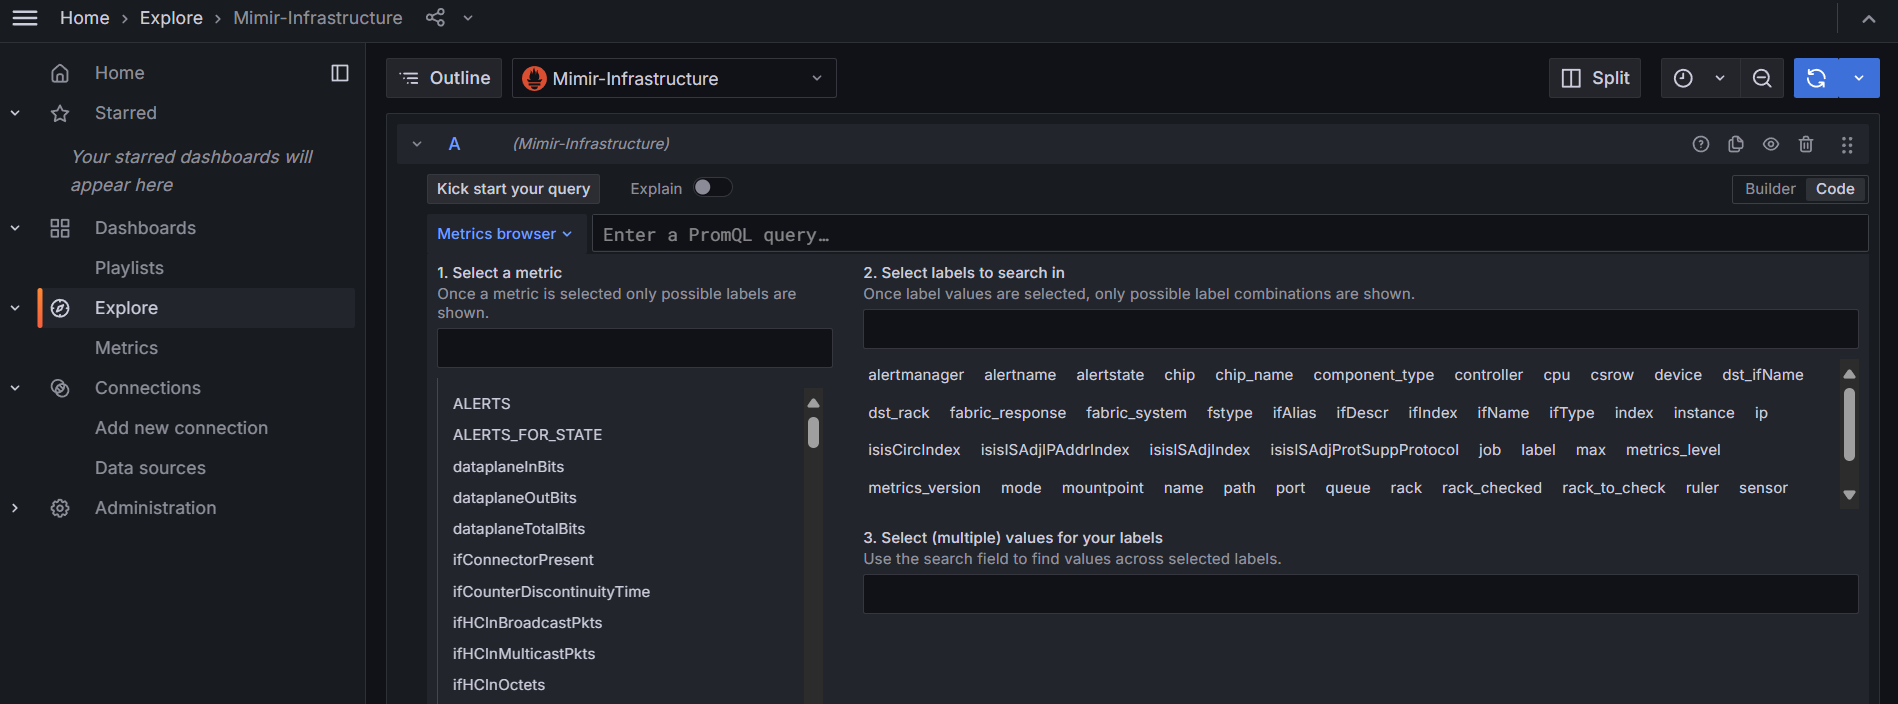

You may select as many labels and values as needed. As you make the selections the resulting query string will appear in the **Resulting selector**.


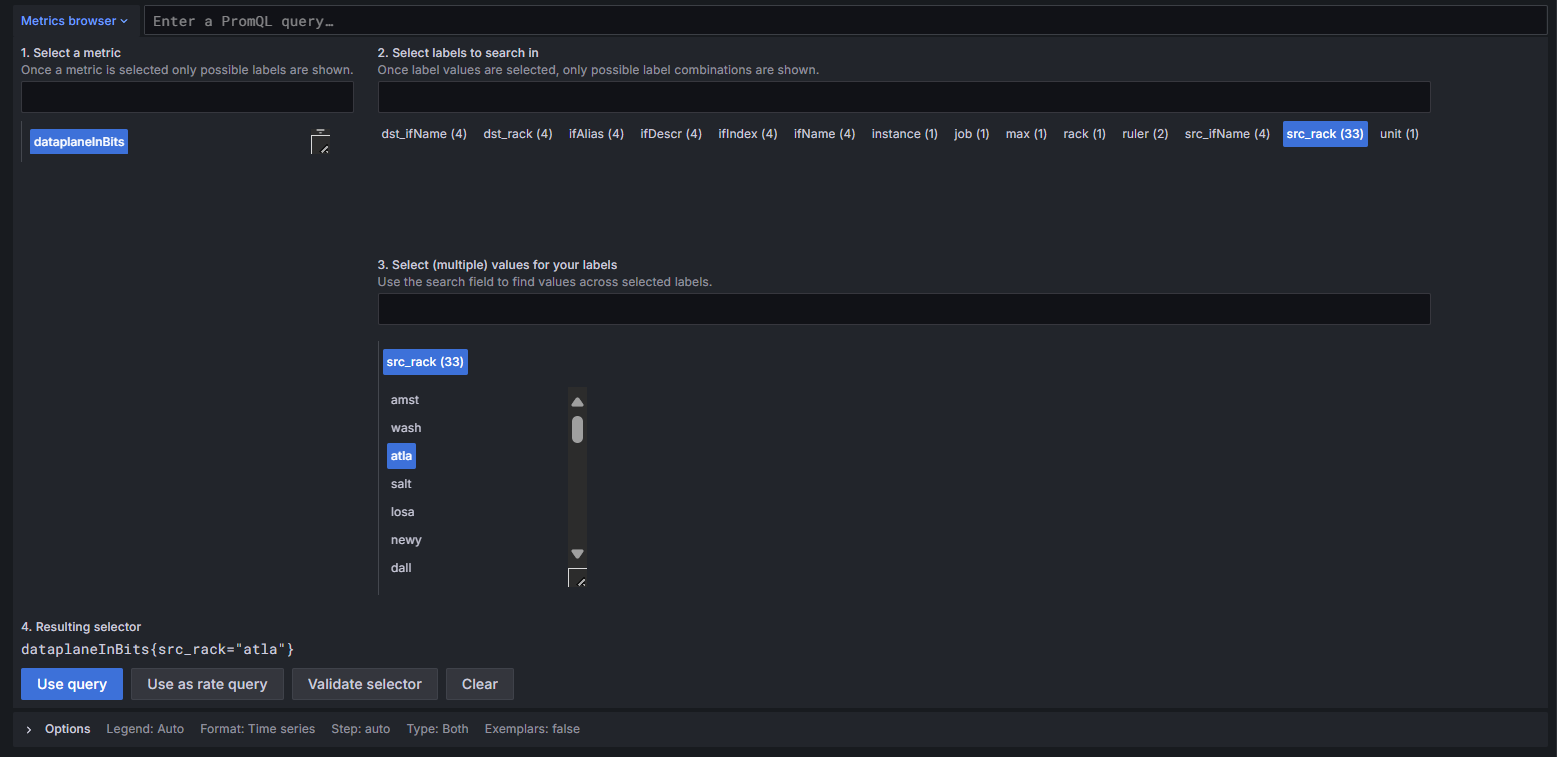

Use the **Query** button to run the query and show the results.

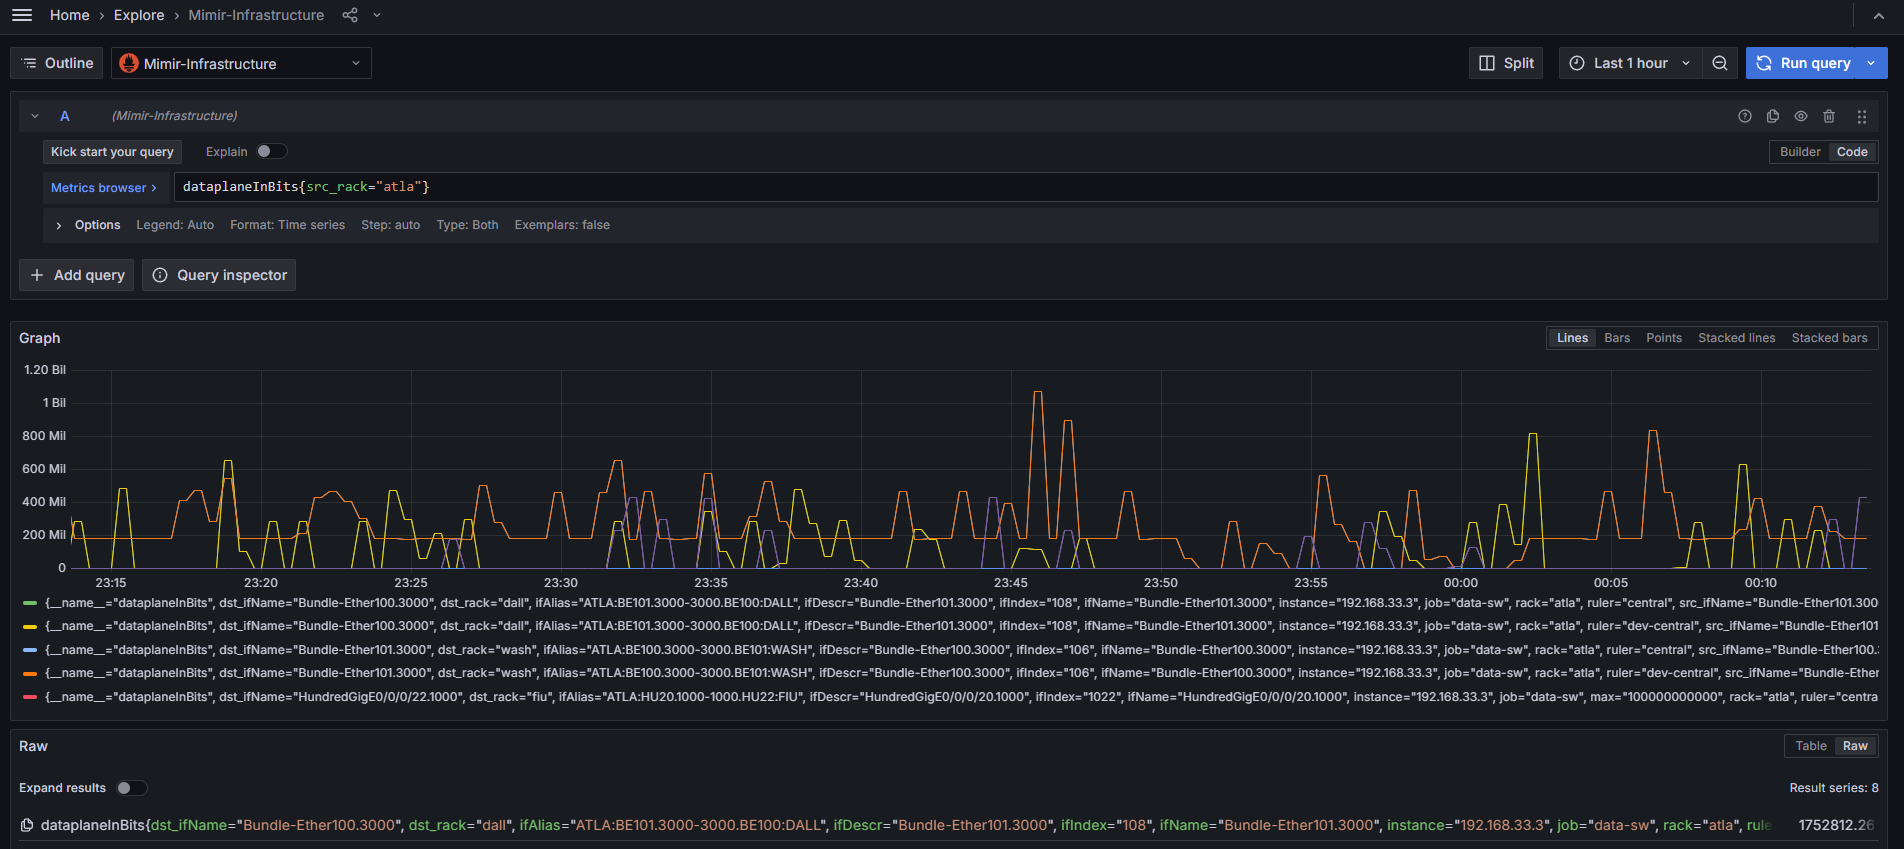

The bottom section will show the **Raw** or **Table** view of the returned results. The Raw view is just the JSON strings. The Table view shows a table with sortable columns and controlls to add more filters to the query.

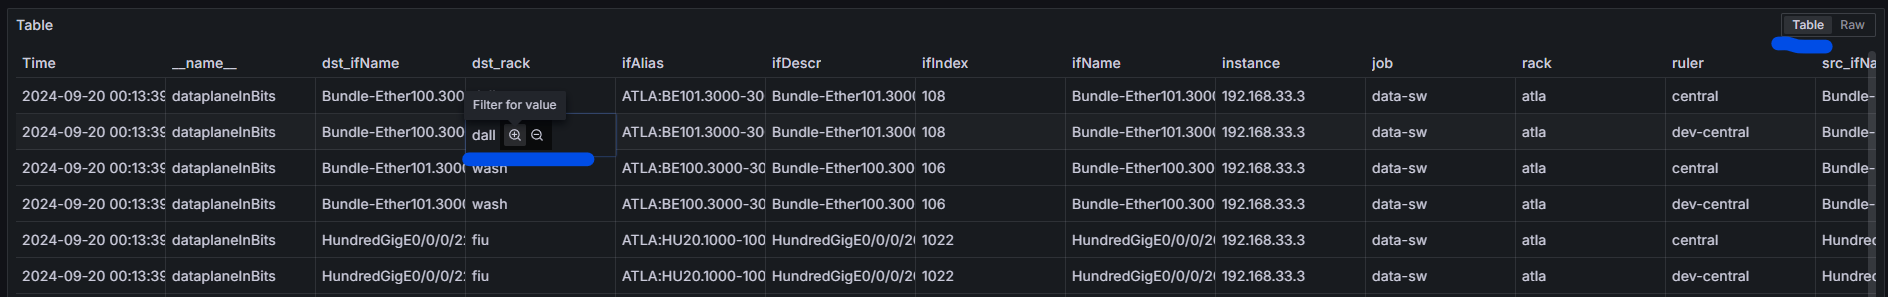

Here the dst_rack = dall filter was added.

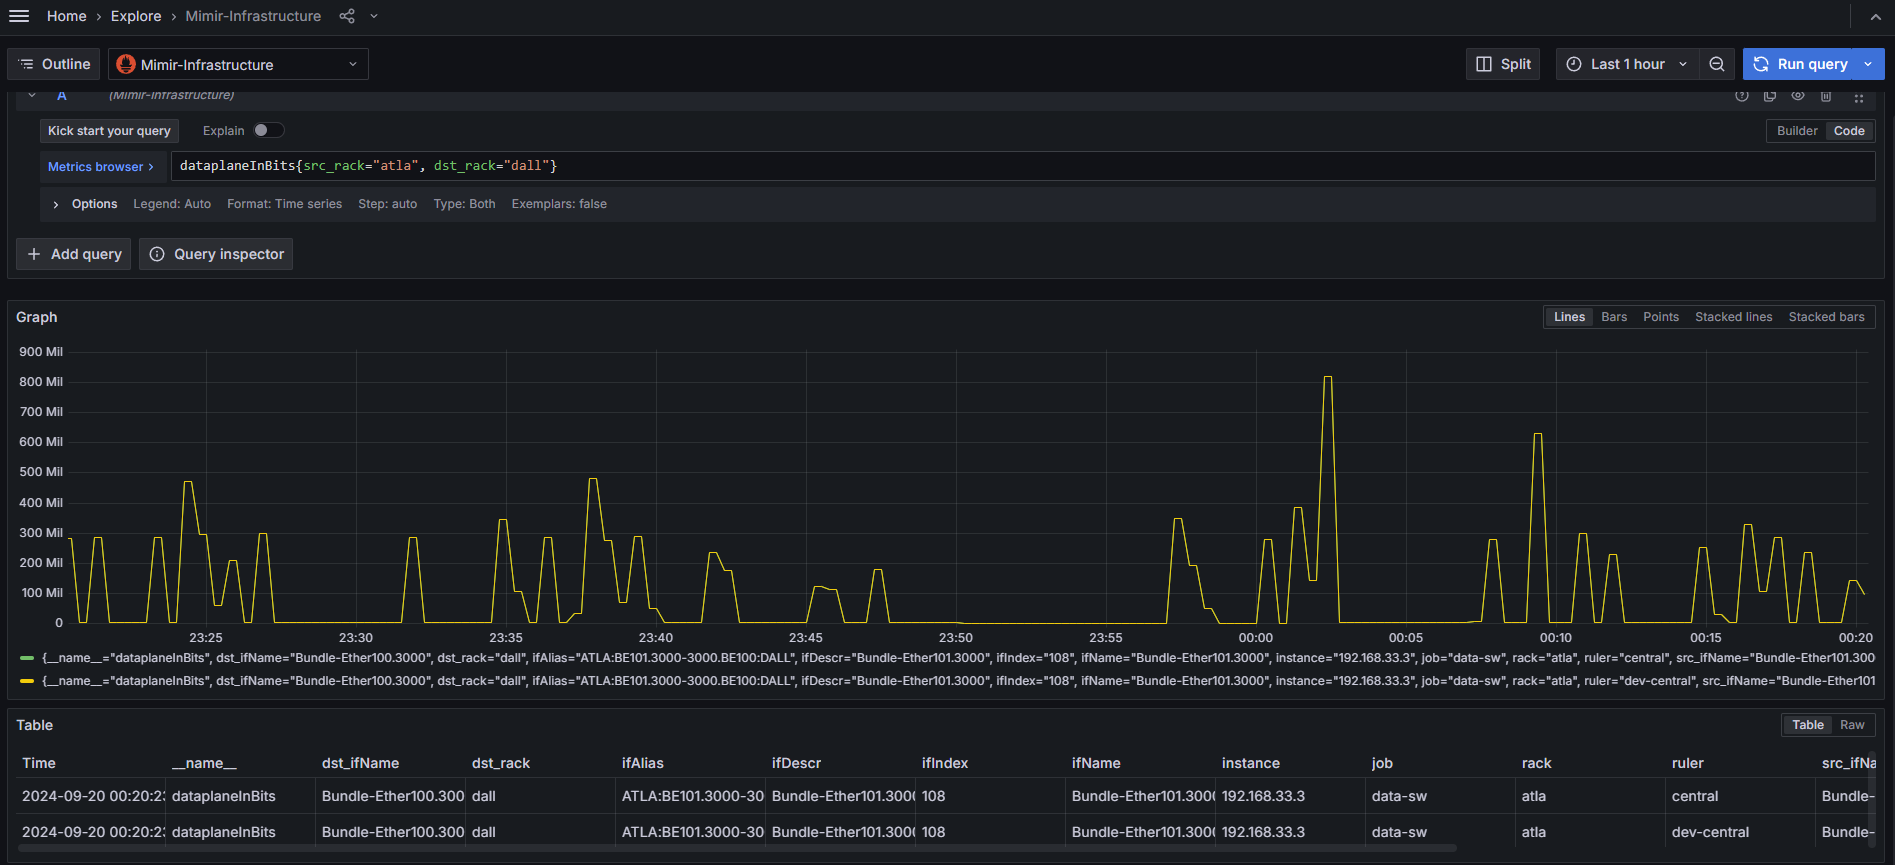

# Handy queries

### Highest Link Traffic

In [ ]:
# Link with the Highest Current Traffic
# Instant Query using query string
query_string = 'topk( 1, dataplaneInBits {ruler="central"})'
url =  "https://infrastructure-metrics.fabric-testbed.net/query"
headers = { 'Authorization': f'fabric-token {id_token}'}
data = {'query': query_string }

response = requests.post(url, headers=headers, params=data)
print(response.content)
    
response.json()["data"]["result"][0] 
json_response = response.json()
metric = json_response["data"]["result"][0]["metric"]
value = json_response["data"]["result"][0]["value"]
Mbits = float(value[1])/1000000

print (f'The link from {metric["src_rack"]} to {metric["dst_rack"]} currently has the most traffic with {Mbits} Mega bits per second.')

In [ ]:
# Links with the Highest Current Traffic
# Instant Query using query string
most_count = "3"
query_string = 'topk(' + most_count + ', dataplaneInBits {ruler="central"})'
url =  "https://infrastructure-metrics.fabric-testbed.net/query"
headers = { 'Authorization': f'fabric-token {id_token}'}
data = {'query': query_string }

response = requests.post(url, headers=headers, params=data)
print(response.content)

json_response = response.json()
print(f"The top {most_count} links with the most traffic.")
for r in json_response["data"]["result"]:
    metric = r["metric"]
    value = r["value"][1]
    Mbits = float(value)/1000000
    info = f'The link from {metric["src_rack"]} to {metric["dst_rack"]} currently has traffic with {Mbits} Mega bits per second.'
    print(info)



### Lowest Link Traffic

In [ ]:
# Links with the Lowest Current Traffic
# Instant Query using query string
most_count = "3"
query_string = 'bottomk(' + most_count + ', dataplaneInBits {ruler="central"})'
url =  "https://infrastructure-metrics.fabric-testbed.net/query"
headers = { 'Authorization': f'fabric-token {id_token}'}
data = {'query': query_string }

response = requests.post(url, headers=headers, params=data)
print(response.content)

json_response = response.json()
print(f"The bottom {most_count} links with the least traffic.")
for r in json_response["data"]["result"]:
    metric = r["metric"]
    value = r["value"][1]
    Mbits = float(value)/1000000
    info = f'The link from {metric["src_rack"]} to {metric["dst_rack"]} currently has traffic with {Mbits} Mega bits per second.'
    print(info)
